The purpose of this notebook is to use the IMDB files and find two things:
1. The average rating per genre
2. The total number of reviews per genre
3. Report each parameter as bar charts separately
4. Combine the parameters into a scatterplot 

In [1]:
pwd

'/Users/miafryer/Documents/flatiron_ds/phase 1/project1/microsoft_movies/individuals/arthur'

In [2]:
cd ../..

/Users/miafryer/Documents/flatiron_ds/phase 1/project1/microsoft_movies


In [3]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import string

In [4]:
#read in the relevant data files
basics_df = pd.read_csv("data/imdb.title.basics.csv")
ratings_df = pd.read_csv("data/imdb.title.ratings.csv")
bom_df = pd.read_csv("data/bom.movie_gross.csv")

In [5]:
#review the basics_df info
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
#review the basics_df info
basics_df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
#review the ratings_df head
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
#review the ratings_df head
ratings_df.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
#review the bom_df info
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
#review the bom_df head
bom_df.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
#remove all rows without a genre
basics_df.dropna(subset=['genres'], inplace=True)

In [12]:
#create a function to remove all punctuations
def rm_punct(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [13]:
#remove all punctuations from basics_df primary title
basics_df['cleaned_title'] = basics_df['primary_title'].apply(rm_punct)

#strip, lowercase, and delete any spaces from title
basics_df['cleaned_title'] = basics_df['cleaned_title'].str.strip().str.lower().str.replace(' ', '')

In [14]:
#remove all punctuations from bom_df primary title
bom_df['cleaned_title'] = bom_df['title'].apply(rm_punct)

#strip, lowercase, and delete any spaces from title
bom_df['cleaned_title'] = bom_df['cleaned_title'].str.strip().str.lower().str.replace(' ', '')

In [15]:
#merge basics file with bom file by title
combined_df = pd.merge(basics_df, bom_df, how='inner', on='cleaned_title')

In [16]:
#fill any NA data in domestic gross to 0
combined_df['domestic_gross'] = combined_df['domestic_gross'].fillna(0)

#fill any NA data in foreign gross to '0' since foreign gross is string
combined_df['foreign_gross'] = combined_df['foreign_gross'].fillna('0')
#remove all punctuations from foreign gross as some numbers have commas ex: 1,000
combined_df['foreign_gross'] = combined_df['foreign_gross'].apply(rm_punct)
#convert numbers into floats
combined_df['foreign_gross'] = combined_df['foreign_gross'].astype(float)

In [17]:
#check combined data
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 0 to 3596
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3597 non-null   object 
 1   primary_title    3597 non-null   object 
 2   original_title   3597 non-null   object 
 3   start_year       3597 non-null   int64  
 4   runtime_minutes  3433 non-null   float64
 5   genres           3597 non-null   object 
 6   cleaned_title    3597 non-null   object 
 7   title            3597 non-null   object 
 8   studio           3594 non-null   object 
 9   domestic_gross   3597 non-null   float64
 10  foreign_gross    3597 non-null   float64
 11  year             3597 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 365.3+ KB


In [18]:
#find the total_gross by adding domestic gross and foreign gross
combined_df['total_gross'] = combined_df['domestic_gross'] + combined_df['foreign_gross']

In [19]:
#filter out any rows with total gross = 0
combined_df = combined_df[(combined_df['total_gross'] != 0)]
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 0 to 3596
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3597 non-null   object 
 1   primary_title    3597 non-null   object 
 2   original_title   3597 non-null   object 
 3   start_year       3597 non-null   int64  
 4   runtime_minutes  3433 non-null   float64
 5   genres           3597 non-null   object 
 6   cleaned_title    3597 non-null   object 
 7   title            3597 non-null   object 
 8   studio           3594 non-null   object 
 9   domestic_gross   3597 non-null   float64
 10  foreign_gross    3597 non-null   float64
 11  year             3597 non-null   int64  
 12  total_gross      3597 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 393.4+ KB


In [20]:
#coverted the genres column, which has genres separated by commas into
#list of strings
combined_df['genres'] = combined_df['genres'].str.strip().str.split(',')

In [21]:
#create a new df with the list of genres separated out into individual rows
e_combined_df = combined_df.explode('genres')
e_combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,cleaned_title,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,Wazir,2016,103.0,Action,wazir,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,wazir,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,wazir,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,ontheroad,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,ontheroad,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,tt8851262,Spring Fever,Spring Fever,2019,NaN,Horror,springfever,Spring Fever,Strand,10800.0,150000.0,2010,160800.0
3595,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Drama,lastletter,Last Letter,CL,181000.0,0.0,2018,181000.0
3595,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Romance,lastletter,Last Letter,CL,181000.0,0.0,2018,181000.0
3596,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,burnthestagethemovie,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,20300000.0


In [22]:
#merge the e_basics_df with the ratings_df
combined_df = pd.merge(e_combined_df, ratings_df, how='inner', on='tconst')
combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,cleaned_title,title,studio,domestic_gross,foreign_gross,year,total_gross,averagerating,numvotes
0,tt0315642,Wazir,Wazir,2016,103.0,Action,wazir,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0,7.1,15378
1,tt0315642,Wazir,Wazir,2016,103.0,Crime,wazir,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0,7.1,15378
2,tt0315642,Wazir,Wazir,2016,103.0,Drama,wazir,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0,7.1,15378
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,ontheroad,On the Road,IFC,744000.0,8000000.0,2012,8744000.0,6.1,37886
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,ontheroad,On the Road,IFC,744000.0,8000000.0,2012,8744000.0,6.1,37886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,helicoptereela,Helicopter Eela,Eros,72000.0,0.0,2018,72000.0,5.4,673
7455,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Drama,lastletter,Last Letter,CL,181000.0,0.0,2018,181000.0,6.4,322
7456,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Romance,lastletter,Last Letter,CL,181000.0,0.0,2018,181000.0,6.4,322
7457,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,burnthestagethemovie,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,20300000.0,8.8,2067


In [23]:
#find the total number of votes by genre
counts_by_genre = combined_df.groupby('genres')['numvotes'].sum()

#convert the number of votes by genre series to dataframe
counts_df = counts_by_genre.to_frame()

In [24]:
#find the total number of votes by genre
avgcounts_by_genre = combined_df.groupby('genres')['numvotes'].mean()

#convert the number of votes by genre series to dataframe
avgcounts_df = avgcounts_by_genre.to_frame()
avgcounts_df.rename(columns={'numvotes': 'avgnumvotes'}, inplace=True)

In [25]:
#create column for average rating * number of votes
combined_df['avgrating_x_numvotes'] = combined_df['averagerating']*combined_df['numvotes']

In [26]:
#find the sumproduct of average rating and number of votes, group by genre
sp_by_genre = combined_df.groupby('genres')['avgrating_x_numvotes'].sum()

#convert sumproduct series to df
sp_df = sp_by_genre.to_frame()

In [27]:
#find average domestic gross by genre and convert to dataframe
dg_by_genre = combined_df.groupby('genres')['domestic_gross'].mean()
dg_df = dg_by_genre.to_frame()

#find average foreign gross by genre and convert to dataframe
fg_by_genre = combined_df.groupby('genres')['foreign_gross'].mean()
fg_df = fg_by_genre.to_frame()

#find average total gross by genre and convert to dataframe
tg_by_genre = combined_df.groupby('genres')['total_gross'].mean()
tg_df = tg_by_genre.to_frame()

In [28]:
#merge all the dfs together
main_df = pd.merge(counts_df, sp_df, on='genres', how='outer')
main_df = pd.merge(main_df, avgcounts_df, on='genres', how='outer')
main_df = pd.merge(main_df, dg_df, on='genres', how='outer')
main_df = pd.merge(main_df, fg_df, on='genres', how='outer')
main_df = pd.merge(main_df, tg_df, on='genres', how='outer')

In [29]:
#check the merged df
main_df.head()

,numvotes,avgrating_x_numvotes,avgnumvotes,domestic_gross,foreign_gross,total_gross
genres,,,,,,
Action,81790610,5.694757e+08,118709.158200,5.792947e+07,1.033122e+08,1.612417e+08
Adventure,73215941,5.202564e+08,155447.857749,9.463536e+07,1.770886e+08,2.717239e+08
Animation,13846247,1.014769e+08,82911.658683,8.487271e+07,1.568181e+08,2.416908e+08
Biography,17243016,1.297994e+08,56720.447368,1.980125e+07,2.410923e+07,4.391048e+07
Comedy,57000544,3.898799e+08,57286.978894,3.338478e+07,4.746262e+07,8.084740e+07


In [30]:
#create the weighted average column
main_df['wavg_rating'] = main_df['avgrating_x_numvotes'] / main_df['numvotes']

In [31]:
#scale down the total gross for the bubble size for a later chart
main_df['total_gross_scaled'] = main_df['total_gross'] / 10**6

In [32]:
main_df.head()

,numvotes,avgrating_x_numvotes,avgnumvotes,domestic_gross,foreign_gross,total_gross,wavg_rating,total_gross_scaled
genres,,,,,,,,
Action,81790610,5.694757e+08,118709.158200,5.792947e+07,1.033122e+08,1.612417e+08,6.962605,161.241681
Adventure,73215941,5.202564e+08,155447.857749,9.463536e+07,1.770886e+08,2.717239e+08,7.105780,271.723938
Animation,13846247,1.014769e+08,82911.658683,8.487271e+07,1.568181e+08,2.416908e+08,7.328838,241.690779
Biography,17243016,1.297994e+08,56720.447368,1.980125e+07,2.410923e+07,4.391048e+07,7.527648,43.910479
Comedy,57000544,3.898799e+08,57286.978894,3.338478e+07,4.746262e+07,8.084740e+07,6.839933,80.847401


In [33]:
#reset the index
main_df = main_df.reset_index()

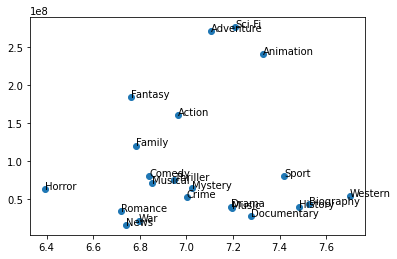

In [34]:
#plot scatter plot: weighted average vs avg total gross
fig, ax = plt.subplots()
ax.scatter(x=main_df['wavg_rating'], y=main_df['total_gross'])
for i, txt in enumerate(main_df['genres']):
    ax.annotate(txt, (main_df['wavg_rating'][i], main_df['total_gross'][i]))

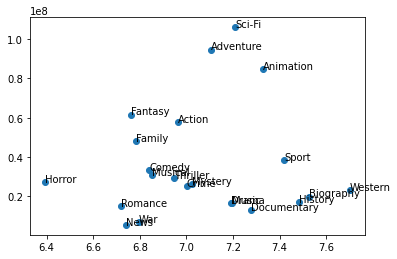

In [35]:
#plot scatter plot: weighted average vs avg domestic gross
fig, ax = plt.subplots()
ax.scatter(x=main_df['wavg_rating'], y=main_df['domestic_gross'])
for i, txt in enumerate(main_df['genres']):
    ax.annotate(txt, (main_df['wavg_rating'][i], main_df['domestic_gross'][i]))

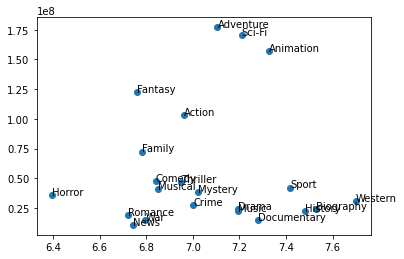

In [36]:
#plot scatter plot: weighted average vs avg foreign gross
fig, ax = plt.subplots()
ax.scatter(x=main_df['wavg_rating'], y=main_df['foreign_gross'])
for i, txt in enumerate(main_df['genres']):
    ax.annotate(txt, (main_df['wavg_rating'][i], main_df['foreign_gross'][i]))

In [37]:
main_df['avgnumvotes'] = main_df['avgnumvotes'] / 10**3

In [38]:
cd images

/Users/miafryer/Documents/flatiron_ds/phase 1/project1/microsoft_movies/images


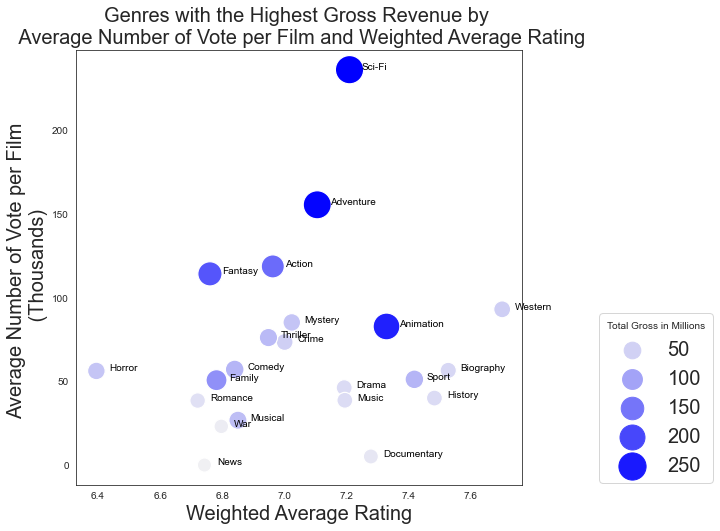

In [39]:
import seaborn as sns


sns.set_style("white",{"axes.facecolor": "1"})

#plot scatter plot: weighted average vs avg number of votes vs avg total gross
plt.figure(figsize = (8,8))
p= sns.scatterplot(data=main_df,
                x='wavg_rating', 
                y='avgnumvotes', 
                size='total_gross_scaled',
                sizes=(200, 800), hue= 'total_gross_scaled', palette="light:b")
plt.legend(title='Total Gross in Millions', bbox_to_anchor=(1.45, -0.02), loc="lower right", frameon=True, fontsize =20)
plt.xlabel("Weighted Average Rating", size=20)
plt.ylabel('Average Number of Vote per Film \n (Thousands)', size=20)
plt.title('Genres with the Highest Gross Revenue by \n Average Number of Vote per Film and Weighted Average Rating', size=20)
#sns.set(font_scale =1.15)
plt.rcParams["axes.labelsize"] = 20
for i, txt in enumerate(main_df['genres']):
    plt.annotate(txt,(main_df['wavg_rating'][i]+.04, main_df['avgnumvotes'][i]-.06), size='medium', color='black',annotation_clip = False )
    
             
plt.savefig('highest_gross_revenue.png', dpi=100, bbox_inches='tight')
    